# LGBM & XGBM

### The objective of this assignment is to compare the performance of Light GBM and XG Boost algorithms using the Titanic dataset. 

Exploratory Data Analysis (EDA):
Data Preprocessing:
Building Predictive Models:
Comparative Analysis:

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import lightgbm as lgb
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the Titanic dataset
train_df = pd.read_csv("C:\\Users\\SHUBHAM GARKAL\\Downloads\\XGBM & LGBM\\XGBM & LGBM\\Titanic_train.csv")
test_df = pd.read_csv("C:\\Users\\SHUBHAM GARKAL\\Downloads\\XGBM & LGBM\\XGBM & LGBM\\Titanic_test.csv")

In [3]:
# Exploratory Data Analysis (EDA)

# Check for missing values
print(train_df.isnull().sum())
print(test_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


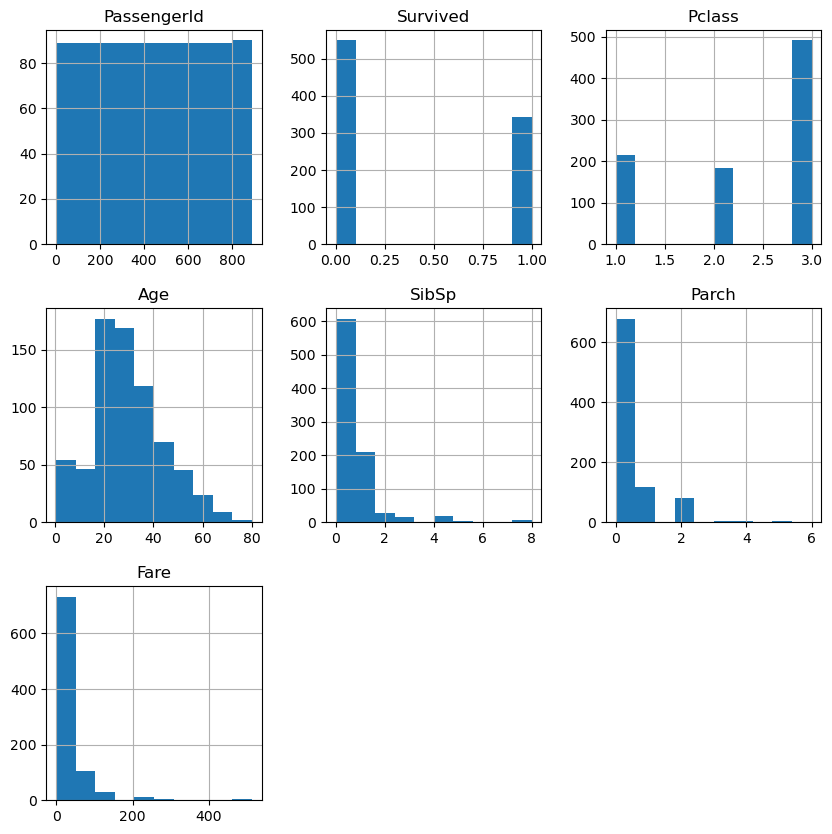

In [4]:
# Explore data distributions
train_df.hist(figsize=(10,10))
plt.show()

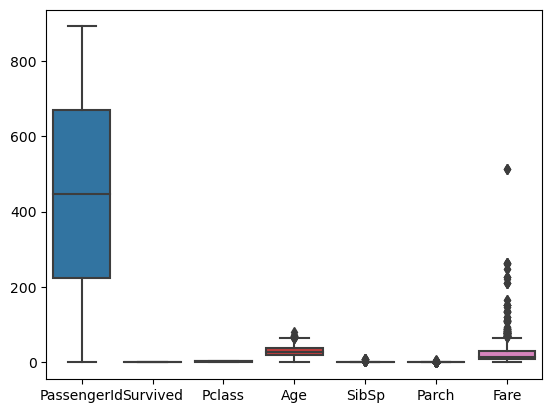

In [5]:
sns.boxplot(data=train_df)
plt.show()

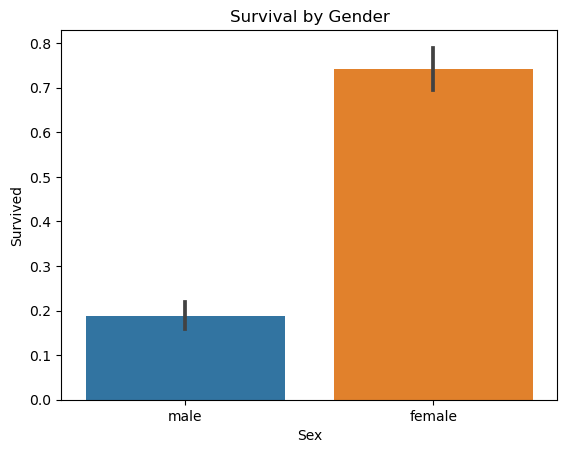

In [6]:
# Visualize relationships between features and survival
sns.barplot(x='Sex', y='Survived', data=train_df)
plt.title('Survival by Gender')
plt.show()

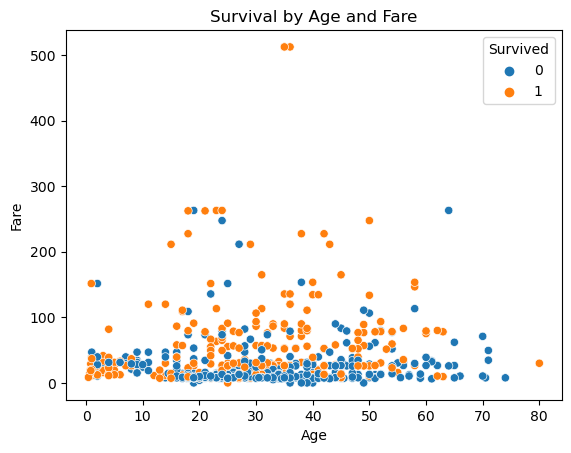

In [7]:
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=train_df)
plt.title('Survival by Age and Fare')
plt.show()

In [8]:
# Data Preprocessing

# Impute missing values
imputer = SimpleImputer(strategy='mean')
train_df['Age'] = imputer.fit_transform(train_df[['Age']])
test_df['Age'] = imputer.transform(test_df[['Age']])

In [9]:
# Encode categorical variables
label_encoder = LabelEncoder()
train_df['Sex'] = label_encoder.fit_transform(train_df['Sex'])
test_df['Sex'] = label_encoder.transform(test_df['Sex'])

In [10]:
onehot_encoder = OneHotEncoder(drop='first', sparse=False)
embarked_encoded_train = onehot_encoder.fit_transform(train_df[['Embarked']])
embarked_encoded_test = onehot_encoder.transform(test_df[['Embarked']])

In [11]:
train_df[['Embarked_C', 'Embarked_Q', 'Embarked_S']] = embarked_encoded_train
test_df[['Embarked_C', 'Embarked_Q', 'Embarked_S']] = embarked_encoded_test

In [12]:
# Building Predictive Models

# Split the dataset into training and testing sets
X = train_df.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)
y = train_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Build and train LightGBM model
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000354 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 196
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier()

In [14]:
# Build and train XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [15]:
# Evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return acc, precision, recall, f1

In [16]:
lgb_acc, lgb_precision, lgb_recall, lgb_f1 = evaluate_model(lgb_model, X_test, y_test)
xgb_acc, xgb_precision, xgb_recall, xgb_f1 = evaluate_model(xgb_model, X_test, y_test)

In [17]:
# Comparative Analysis
performance_df = pd.DataFrame({
    'Model': ['LightGBM', 'XGBoost'],
    'Accuracy': [lgb_acc, xgb_acc],
    'Precision': [lgb_precision, xgb_precision],
    'Recall': [lgb_recall, xgb_recall],
    'F1 Score': [lgb_f1, xgb_f1]
})

In [18]:
print(performance_df)

      Model  Accuracy  Precision    Recall  F1 Score
0  LightGBM  0.843575   0.819444  0.797297  0.808219
1   XGBoost  0.798883   0.763889  0.743243  0.753425


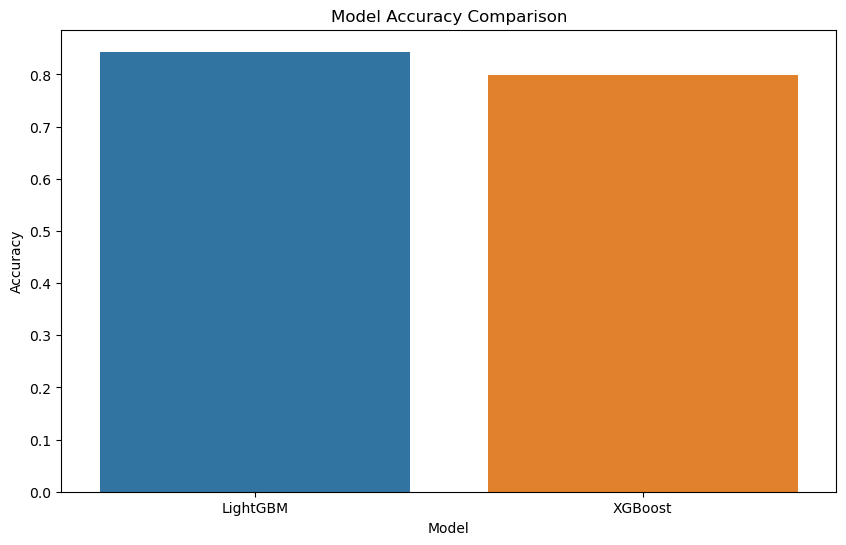

In [19]:
# Visualize results
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=performance_df)
plt.title('Model Accuracy Comparison')
plt.show()

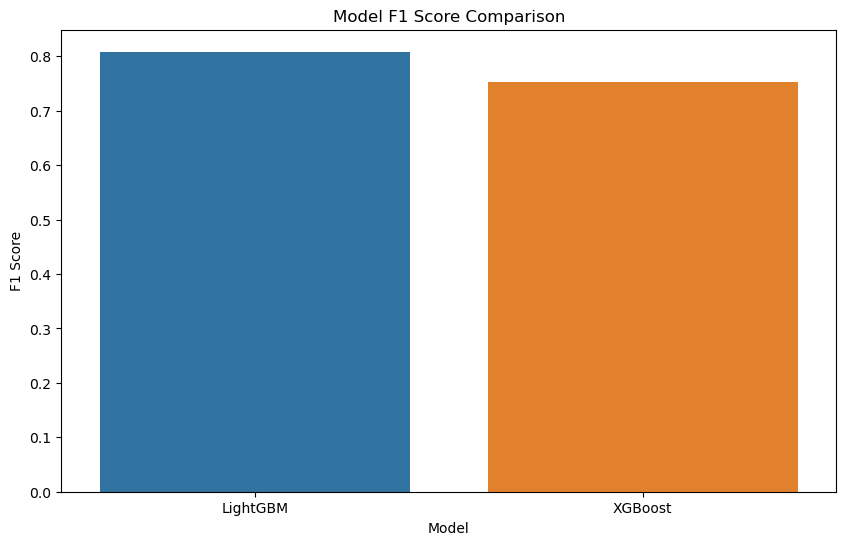

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='F1 Score', data=performance_df)
plt.title('Model F1 Score Comparison')
plt.show()